# Loading in our data from main.ipynb to build the initial model

### Loading the data

In [ ]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

with open("prepared_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val = data["X_val"]
X_test = data["X_test"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
num_classes = data["num_classes"]

### Data Normalization

In [23]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Building the model

In [24]:
def leNet_model(num_classes):
    model = Sequential()

    model.add(Conv2D(60, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

model = leNet_model(num_classes)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 750)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │        12,024 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 405,314 (1.55 MB)

 Trainable params: 405,314 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

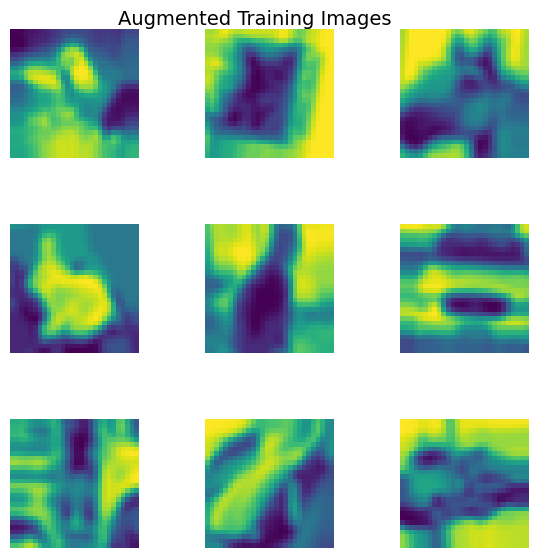

In [25]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10
)

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=50)

batches = datagen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
fig.tight_layout()

for i in range(9):
    r = i // 3
    c = i % 3
    axs[r, c].imshow(X_batch[i])
    axs[r, c].axis('off')

plt.suptitle('Augmented Training Images', fontsize=14)
plt.show()

### Training the model

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 50,
    epochs=30,
    batch_size=20,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.1998 - loss: 2.5313 - val_accuracy: 0.3407 - val_loss: 2.1653
Epoch 2/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3119 - loss: 2.2396 - val_accuracy: 0.3749 - val_loss: 2.0459
Epoch 3/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3454 - loss: 2.1462 - val_accuracy: 0.3824 - val_loss: 2.0005
Epoch 4/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3605 - loss: 2.0946 - val_accuracy: 0.4101 - val_loss: 1.9228
Epoch 5/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.3740 - loss: 2.0451 - val_accuracy: 0.4222 - val_loss: 1.9037
Epoch 6/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3898 - loss: 1.9936 - val_accuracy: 0.4321 - val_loss: 1.8832
Epoch 7/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.4042 - loss: 1.9650 - val_accuracy: 0.4444 - val_loss: 1.8273
Epoch 8/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.4073 - loss: 1.9525 - 

### Evaluating the model

285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6160 - loss: 1.2311
Test Loss: 1.5579975843429565
Test Accuracy: 0.5331867933273315


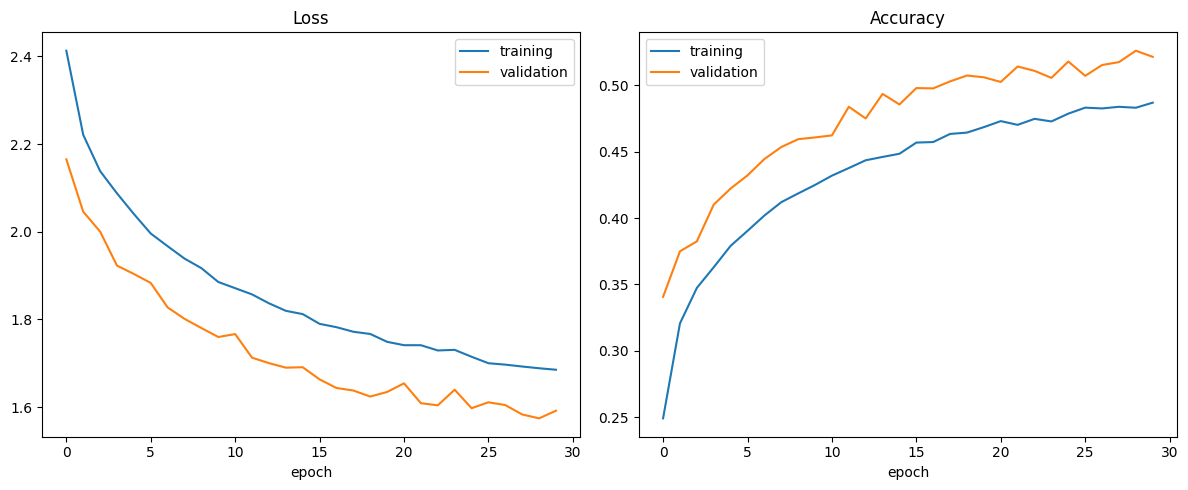

In [27]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Loss")
plt.xlabel("epoch")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

plt.tight_layout()
plt.show()
